In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
# Hyperparameters
input_size = 784 # 28*28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [20]:
train_dataset = torchvision.datasets.MNIST(root='/home/iai/Desktop/Jeewon/Study/PyTorch/data',
                                              train = True,
                                              transform = transforms.ToTensor(),
                                              download=True
                                              )

test_dataset = torchvision.datasets.MNIST(root='/home/iai/Desktop/Jeewon/Study/PyTorch/data',
                                              train = False,
                                              transform = transforms.ToTensor())

In [21]:
# Data Loader

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [22]:
examples = iter(test_loader)
example_data, example_targets = next(examples)

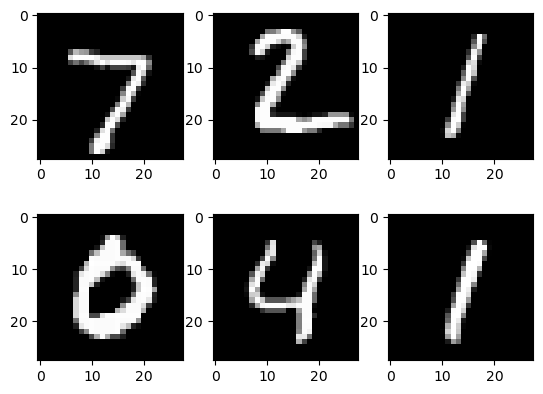

In [23]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    
plt.show()

In [24]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out
   
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:
# Train the model(epoch = 2)
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward Pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.3537
Epoch [1/2], Step [200/600], Loss: 0.2823
Epoch [1/2], Step [300/600], Loss: 0.1997
Epoch [1/2], Step [400/600], Loss: 0.1919
Epoch [1/2], Step [500/600], Loss: 0.1661
Epoch [1/2], Step [600/600], Loss: 0.1222
Epoch [2/2], Step [100/600], Loss: 0.1616
Epoch [2/2], Step [200/600], Loss: 0.0778
Epoch [2/2], Step [300/600], Loss: 0.0518
Epoch [2/2], Step [400/600], Loss: 0.0981
Epoch [2/2], Step [500/600], Loss: 0.1292
Epoch [2/2], Step [600/600], Loss: 0.1220


In [25]:
# Train the model(epoch = 10)
n_total_steps = len(train_loader)

for epoch in range(10):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward Pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/10], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/600], Loss: 0.6148
Epoch [1/10], Step [200/600], Loss: 0.5192
Epoch [1/10], Step [300/600], Loss: 0.2694
Epoch [1/10], Step [400/600], Loss: 0.2110
Epoch [1/10], Step [500/600], Loss: 0.0593
Epoch [1/10], Step [600/600], Loss: 0.1881
Epoch [2/10], Step [100/600], Loss: 0.1205
Epoch [2/10], Step [200/600], Loss: 0.0538
Epoch [2/10], Step [300/600], Loss: 0.1140
Epoch [2/10], Step [400/600], Loss: 0.0780
Epoch [2/10], Step [500/600], Loss: 0.1591
Epoch [2/10], Step [600/600], Loss: 0.1184
Epoch [3/10], Step [100/600], Loss: 0.1217
Epoch [3/10], Step [200/600], Loss: 0.0302
Epoch [3/10], Step [300/600], Loss: 0.0665
Epoch [3/10], Step [400/600], Loss: 0.0207
Epoch [3/10], Step [500/600], Loss: 0.0500
Epoch [3/10], Step [600/600], Loss: 0.0909
Epoch [4/10], Step [100/600], Loss: 0.0698
Epoch [4/10], Step [200/600], Loss: 0.0454
Epoch [4/10], Step [300/600], Loss: 0.0656
Epoch [4/10], Step [400/600], Loss: 0.0486
Epoch [4/10], Step [500/600], Loss: 0.1690
Epoch [4/10

In [26]:
# Test the model
# No need to compute gradients!

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _,predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')


Accuracy of the network on the 10000 test images: 98.04 %
